# Image Feature Extraction

## Завдання

1.	Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра **Собеля.**

2.	Використовуючи метод густини градієнта **(HOG)**, напишіть код для витягування ознак з зображення.

## Розв'язок

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from mpl_toolkits.axes_grid1 import ImageGrid
import warnings
warnings.filterwarnings("ignore")

### 1. Визначення границь та кутів у зображенні за допомогою фільтра Собеля.

In [2]:
img = cv2.imread('Veluka_Dumerka.jpg')

In [3]:
# Converting to black and white
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gradient Edge Detector
sobelx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)

# Calculation of the absolute value of the gradient
abs_sobelx = cv2.convertScaleAbs(sobelx)
abs_sobely = cv2.convertScaleAbs(sobely)
grad = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)

# Definition of angles
angle = cv2.phase(sobelx, sobely, angleInDegrees=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


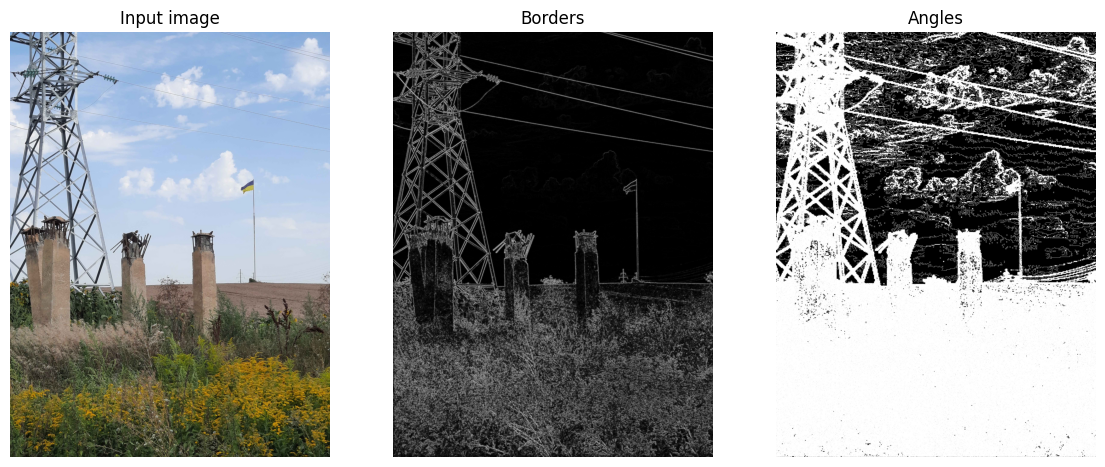

In [4]:
# Image comparison
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grad1 = cv2.cvtColor(grad, cv2.COLOR_BGR2RGB)
angle1 = cv2.cvtColor(angle, cv2.COLOR_BGR2RGB)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 7), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img1, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(grad1, cmap=plt.cm.gray)
ax2.set_title('Borders')

ax3.axis('off')
ax3.imshow(angle1, cmap=plt.cm.gray)
ax3.set_title('Angles')
plt.show()

---

### 2.	Витягування ознак з зображення  з використанням методу густини градієнта (HOG)

In [5]:
from skimage.feature import hog
from skimage import data, exposure

### 2.1 HOG для кольорового зображення

In [6]:
image = cv2.imread('Veluka_Dumerka.jpg')

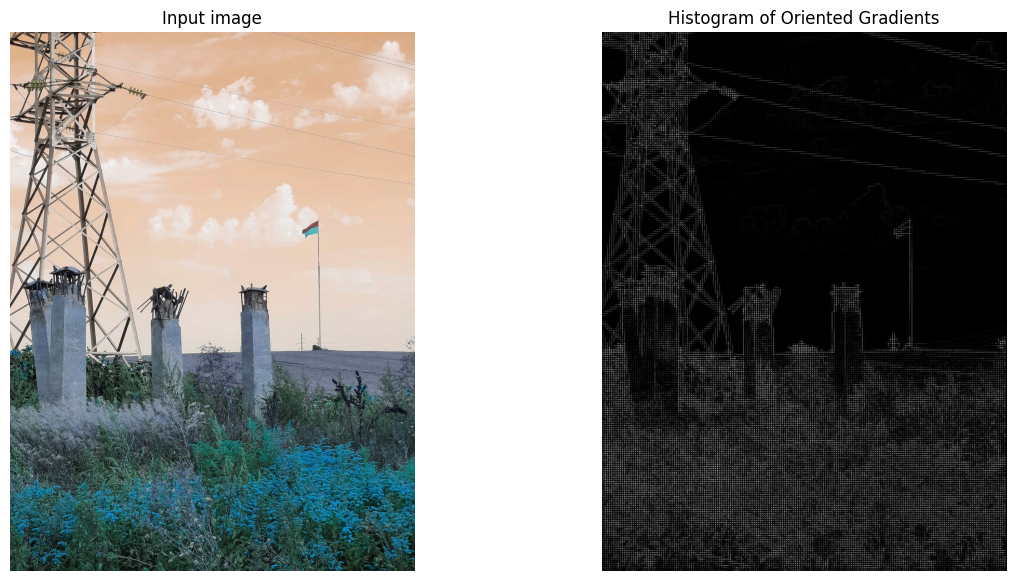

In [7]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

---

###  2.2 HOG для чорно-білого зображення

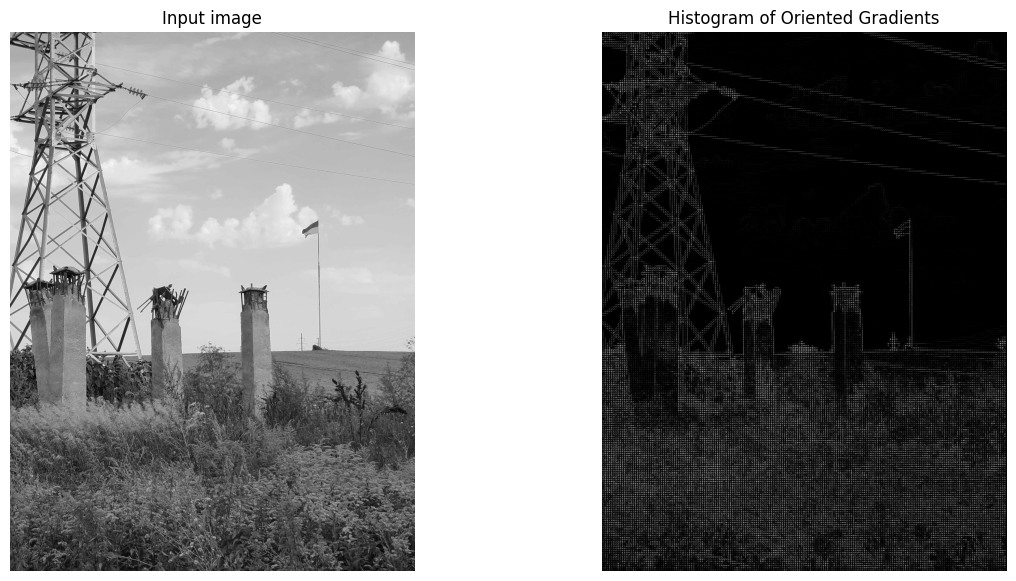

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fd, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(gray, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

---

## Висновок 1_2

Алгоритм HOG однаково успішно працює на кольорових та чорно-білих зображеннях.